# TUTORIAL: Train YOLO model for Rock / Paper / Scissors game

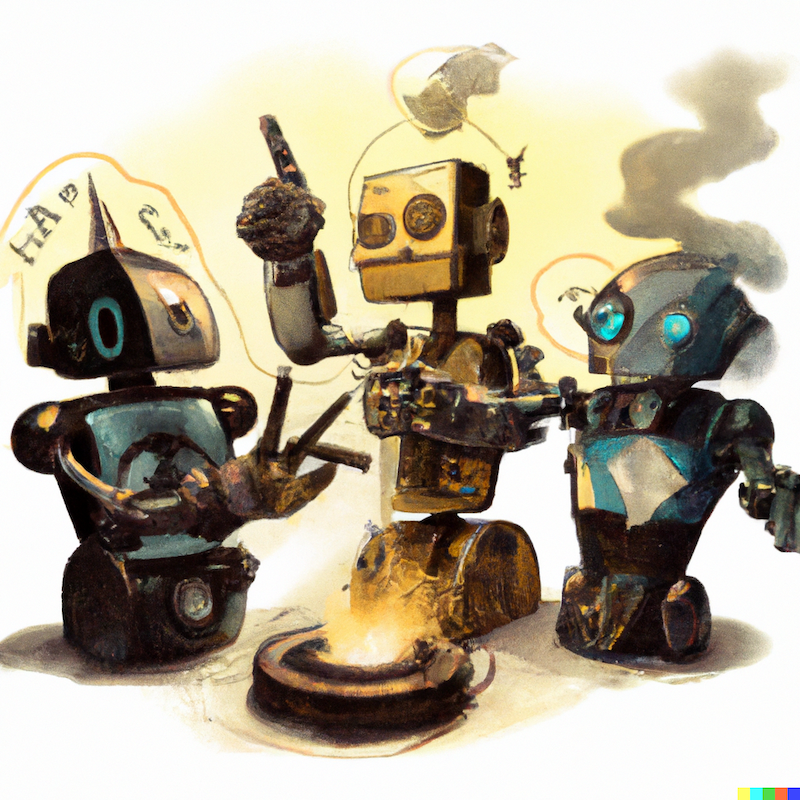

*A guide to use Transfer Learning on YOLO model in order to play to the Rock / Paper / Scissors game through an AI Notebook.*

## Introduction

The purpose of this tutorial is to show how it is possible to train YOLO model to play to the game "rock paper scissors"!
YOLO is an object detection algorithm. Although closely related to image classification, object detection performs image classification on a more precise scale. Object detection locates and categorizes features in images.

It is based on the YOLO open source [repository](https://github.com/ultralytics/ultralytics).

## Code

The different steps are as follow:

- Download the Rock / Paper / Scissors Dataset
- Install Ultralytics dependencies
- Import dependencies and check GPU availability
- Retrieve pre-trained YOLO model weights
- Test the model on a scissors example
- Run YOLO training on 🪨 / 📃 / ✂️ Dataset
- Display results of YOLO training on 🪨 / 📃 / ✂️ Dataset
- Export trained weights for future inference
- Create a new YOLO model object based on the exported weights
- Test your YOLO custom model on the 🪨 / 📃 / ✂️ Dataset
- Run YOLO inference on new images

# Download the Rock / Paper / Scissors Dataset

The Rock / Paper / Scissors Dataset is available on <a href="https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw">Roboflow</a>.

If you want to use this **Public Dataset** on the tutorial, follow the next requirements:

- create a Roboflow account
- click on `Download this dataset` in order to download the collection of data
- select `YOLO xx` format
- choose the method `show download code`
- confirm by clicking on the `Continue` button

In the window that opens, click on the `>_ Terminal` tab. You will get a `curl` command, followed by your `<dataset_url>`, that will allow you to download your dataset directly inside the notebook.

To download it, replace `<dataset_url>` with yours in the following command:

In [ ]:
# go to the folder corresponding to your object container
%cd /workspace/data

# unzip downloaded dataset zip file silently (-q for quiet mode)
# make sure to prefix the curl command with a ! to ensure that it is executed as a shell command (instead of Python)
!curl -L "<dataset_url>" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

## Install Ultralytics dependencies
The easiest way to use YOLO is to install Python dependency for ultralytics
> Feel free to install more recent version than 8.3.3 if there is one

In [ ]:
pip install ultralytics==8.3.3 -U

## Import dependencies and check GPU availability

In [3]:
import ultralytics
from ultralytics import YOLO

ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.11.4 torch-2.2.2+cu121 CUDA:0 (Tesla V100S-PCIE-32GB, 32501MiB)
Setup complete ✅ (60 CPUs, 172.7 GB RAM, 2219.1/3519.5 GB disk)


## Retrieve pre-trained YOLO model weights

In this tutorial, we will do **Transfer Learning** based on a YOLO model pre-trained on the <a href="https://cocodataset.org/">COCO dataset</a>.

**How to define Transfer Learning?**

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned. As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

Main advantages of Transfer Learning:

- saving resources
- improving efficiency
- model training facilitation
- saving time

**What is the COCO dataset?**

COCO is a large-scale object detection, segmentation, and also captioning dataset. COCO has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250 000 people with keypoints

In [4]:
# Get the weights of the pre-trained YOLO model
# You can use a more recent version of YOLO if there is one
model = YOLO('yolo11n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 99.0MB/s]


## Test the model on a scissors example

The aim of this test is to show that the pre-trained model is currently unable to recognize the rock / paper / scissors game.

You can consult the [Ultralytics Predict Documentation](https://docs.ultralytics.com/modes/predict/) for guidance.

In [ ]:
model.predict('/workspace/data/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg', project='/workspace/data/runs/predicts', verbose=True, save=True, conf=0.5)

By running this function, you will obtain an output in which the first line indicates the element(s) detected within the image. 

**Parameters definition**

Within this function, we specify:
- The `source` from which we want our prediction (can be an image path, video file, directory, URL, ...).
- The minimum confidence threshold `conf`. Detections with confidence below this threshold will be disregarded.
- A `save=True` parameter, which allow us to view the resulting image, which will be stored in the path indicated in the function output.

FYI, you could also have run `model(image)`, which would also have given you the prediction. But the `predict()` function allows you to specify more parameters (save, conf, ...).

## Run YOLO training on 🪨 / 📃 / ✂️ dataset

You can consult the [Ultralytics Train Documentation](https://docs.ultralytics.com/modes/train/) for guidance.

In [ ]:
result = model.train(data='/workspace/data/data.yaml', device=0, epochs=5, project='/workspace/data/runs/trains', verbose=True)

**Parameters definitions**:

- `data`: refers to the path to the dataset `.yaml` file.
- `device`: determines the device on which the model will be trained (we want to use GPU).
- `epochs`: refers to the number of training epochs. An epoch corresponds to one training cycle through the full training dataset.
- `project`: path where the information files are generated during the training
- `verbose`: to display some additional execution logs.

## Display results of YOLO training on 🪨 / 📃 / ✂️ dataset

According to the last line of the training output, your results have been saved in the `/workspace/data/runs/trains/train` folder. This folder contains several images, showing the performance of the trained model.

Let's display these images one by one and analyse them to understand how your trained model behaves !

### Confusion Matrix

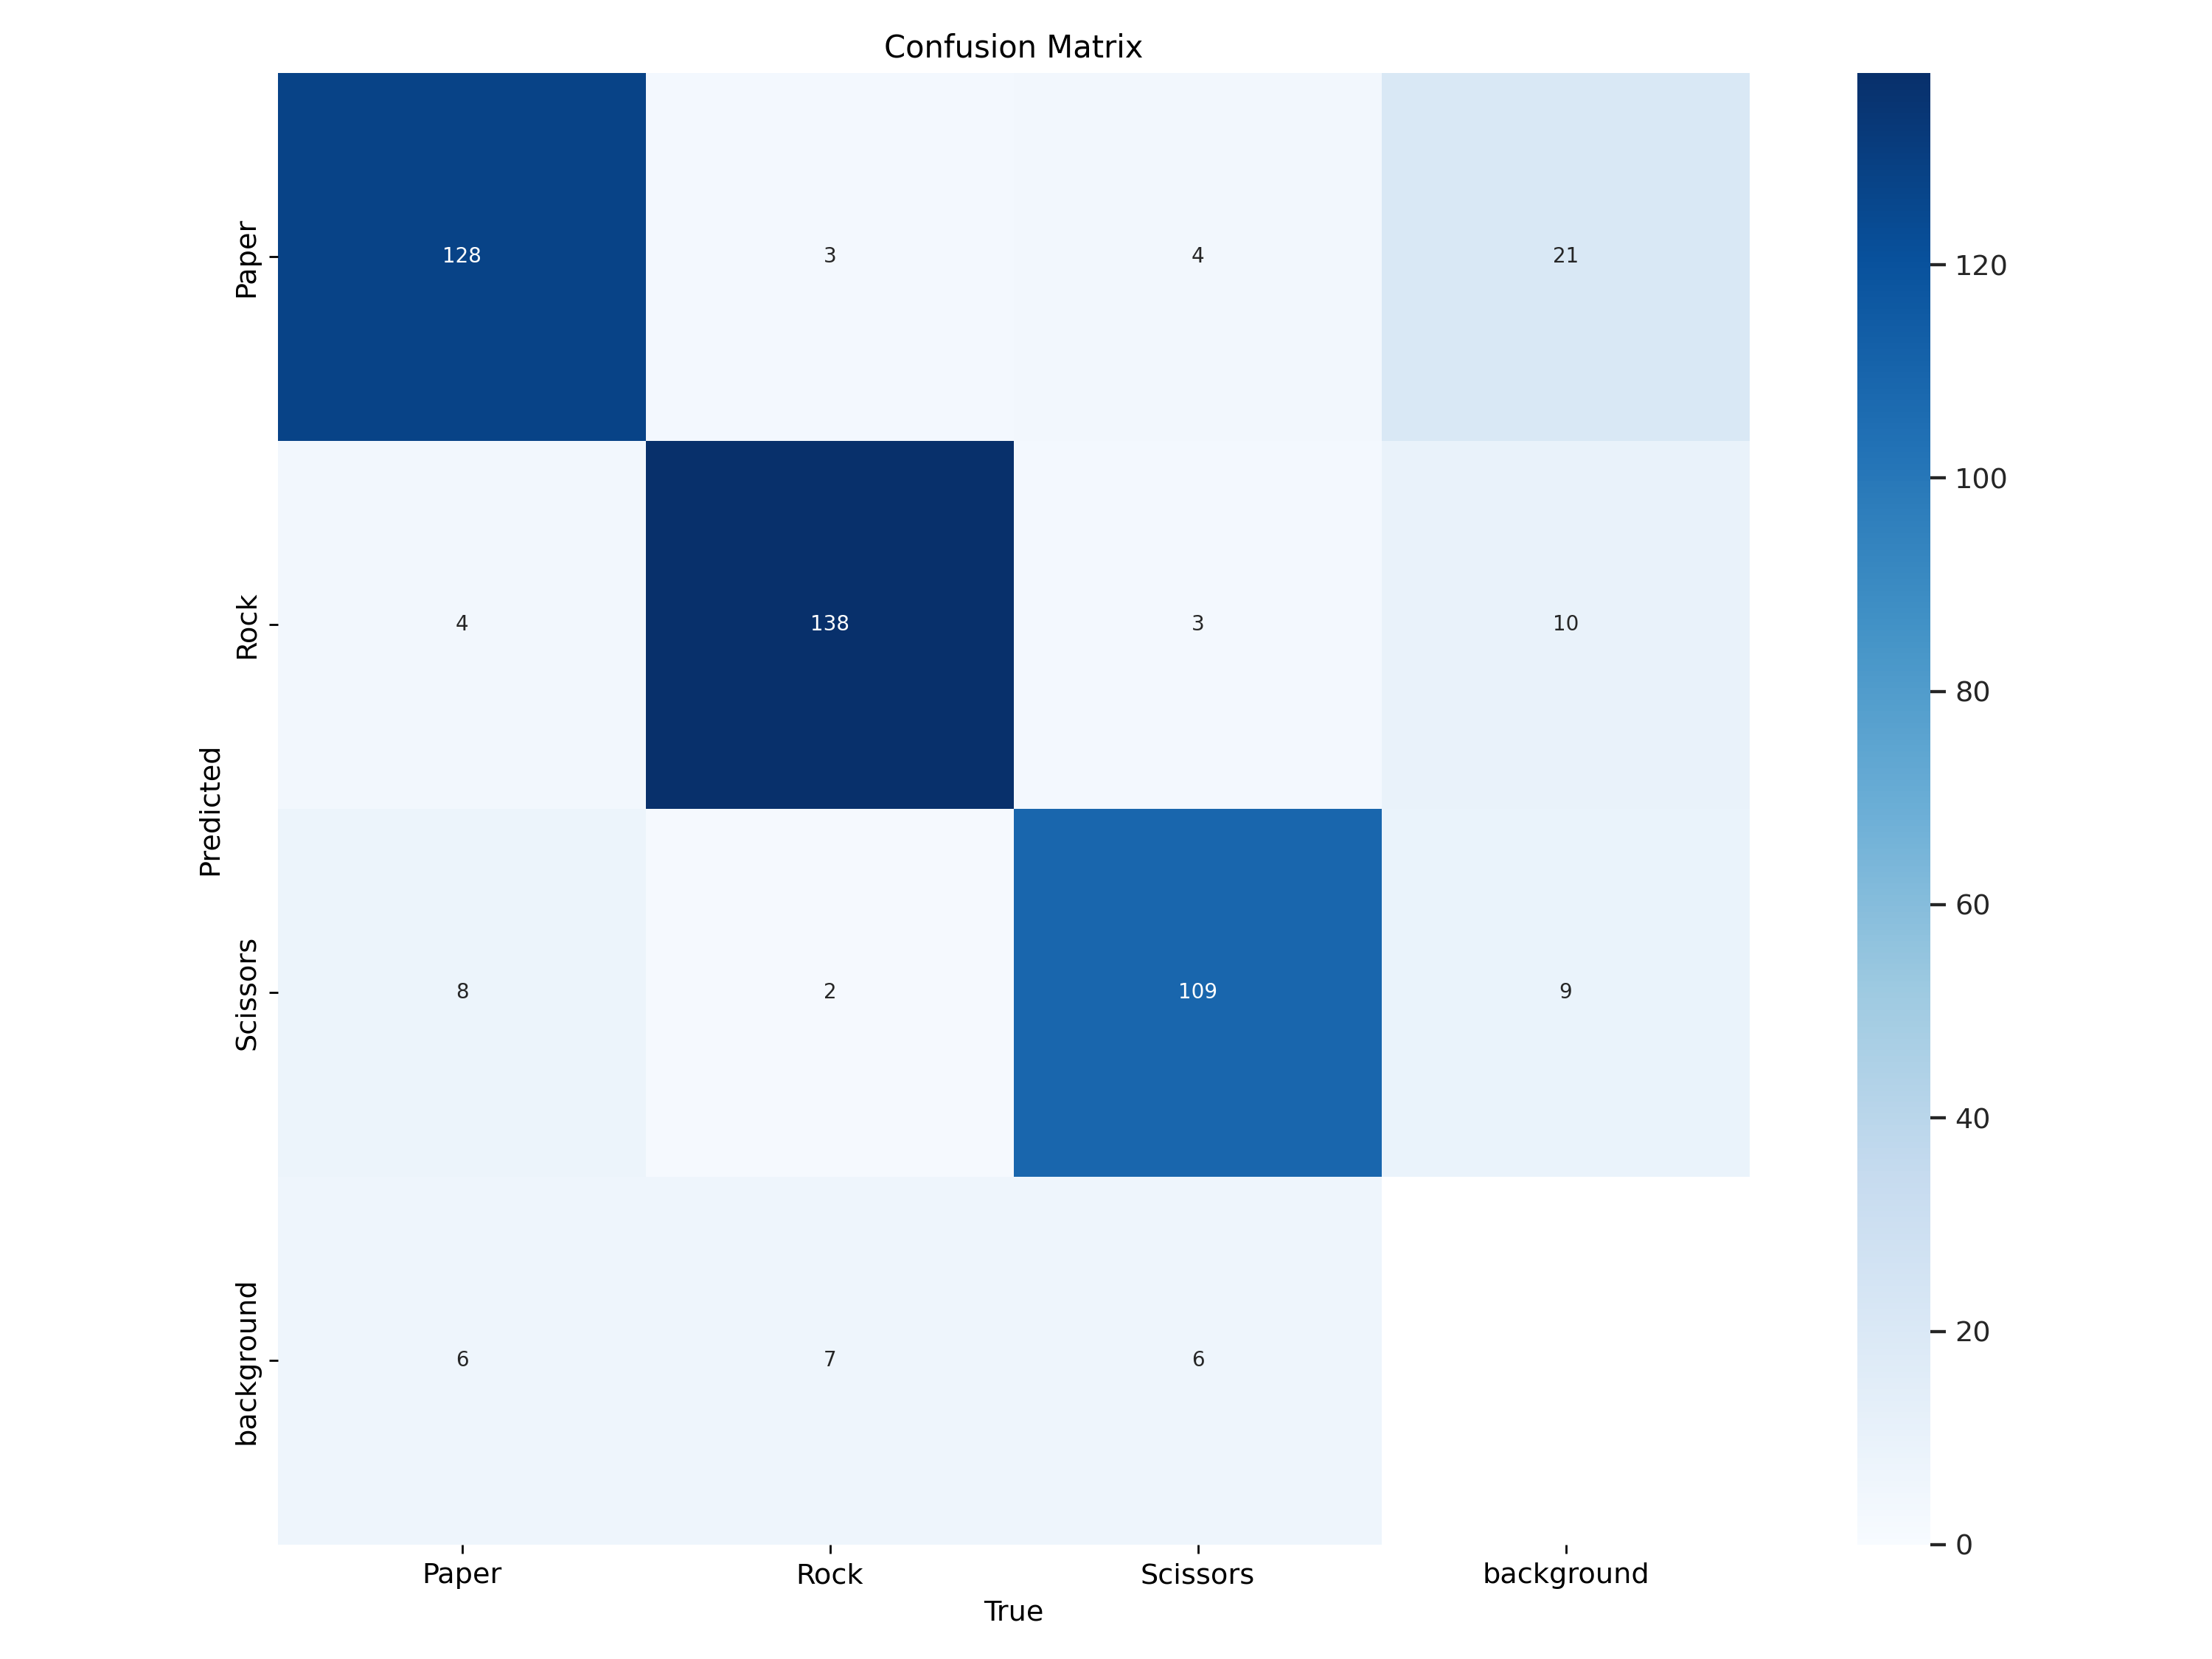

In [7]:
# to display images
from IPython.display import Image

# display the confusion matrix image
Image(filename='/workspace/data/runs/trains/train/confusion_matrix.png', width=1000)

The matrix shows that the model correctly identified 132 instances of "Paper", 141 instances of "Rock", and 113 instances of "Scissors" (Main diagonal). It also shows that some instances were incorrectly classified.

Overall, this matrix suggests that the model performs well in recognizing 'Rock', 'Paper', and 'Scissors' gestures, but there is still room for improvement with further training, given that the model has only been trained for 5 epochs.

You can also vizualise the normalized confusion matrix file `confusion_matrix_normalized.png`, which represents the data in proportions rather than raw counts.

### Groundtruth & Predicted Batch examples

To better understand these numbers and see how well the model detects and classifies objects in images, we can vizualize and compare the ground truth labels for a set of images with the predictions made by the model for those same images. By visualizing the label and prediction images side by side, we can easily see how well the model is doing and where it might be making mistakes.

These results are available for both the training set and the validation one.

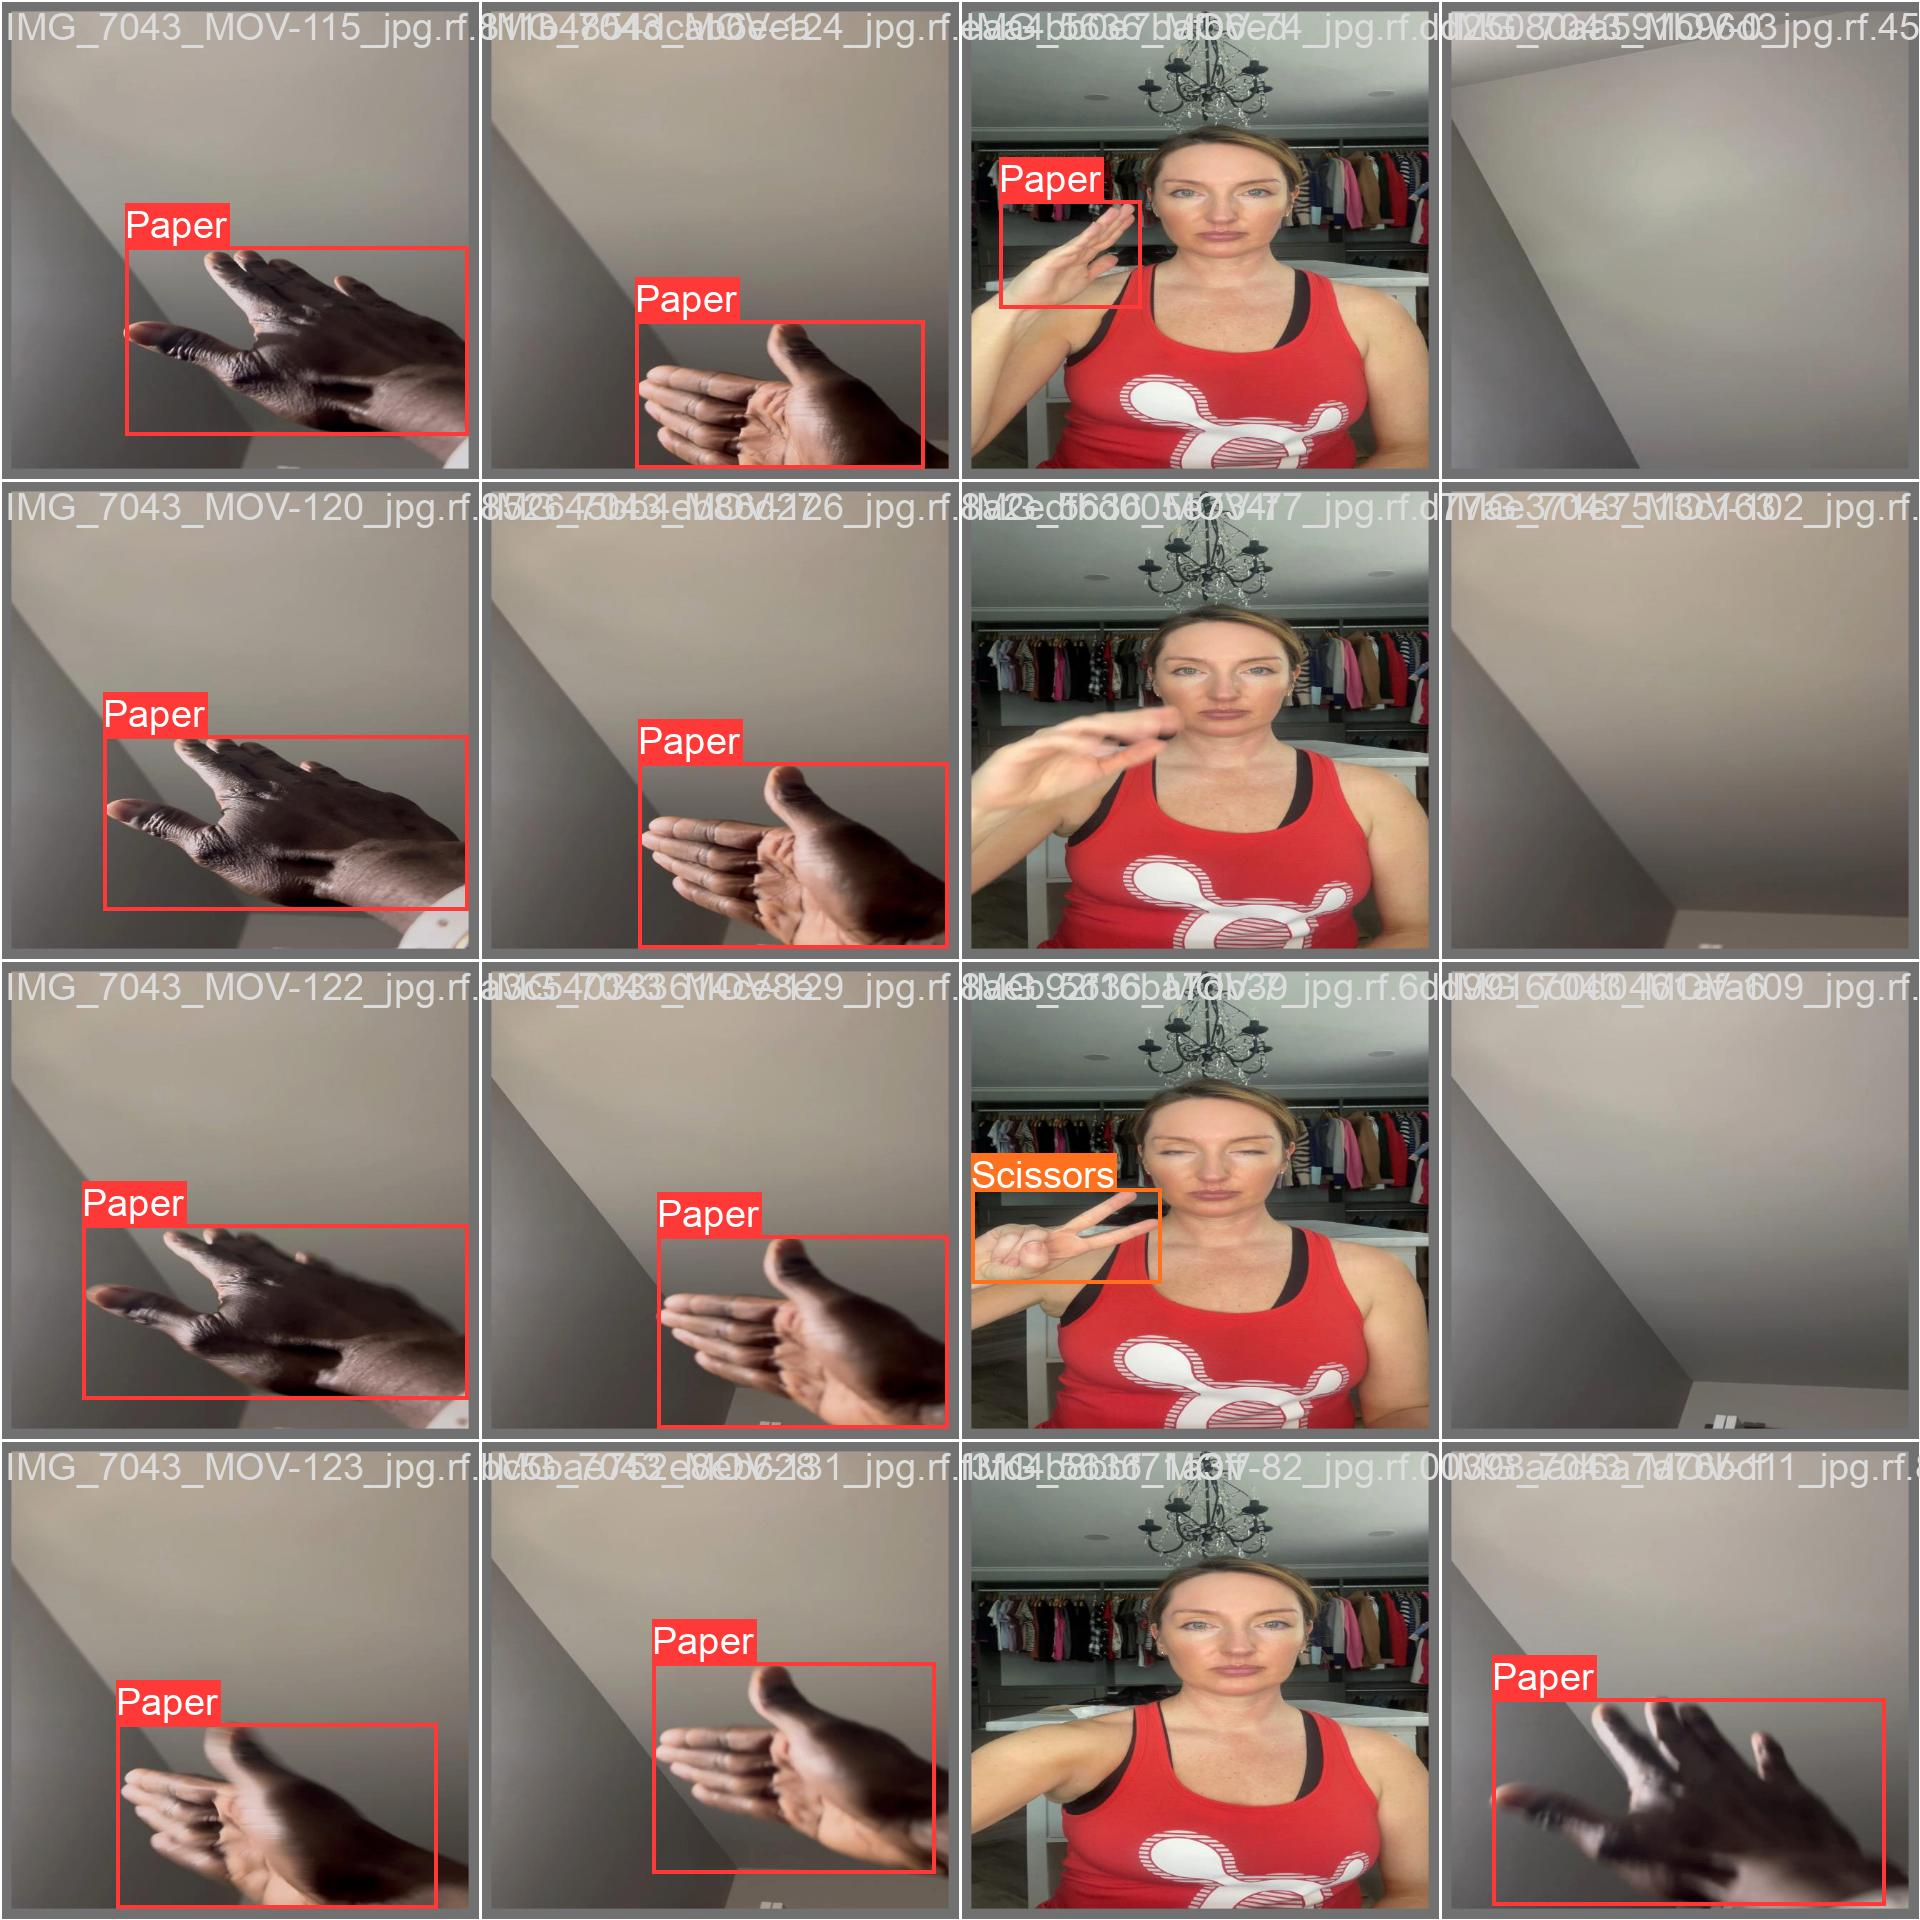

In [8]:
Image(filename='/workspace/data/runs/trains/train/val_batch2_labels.jpg', width=600)

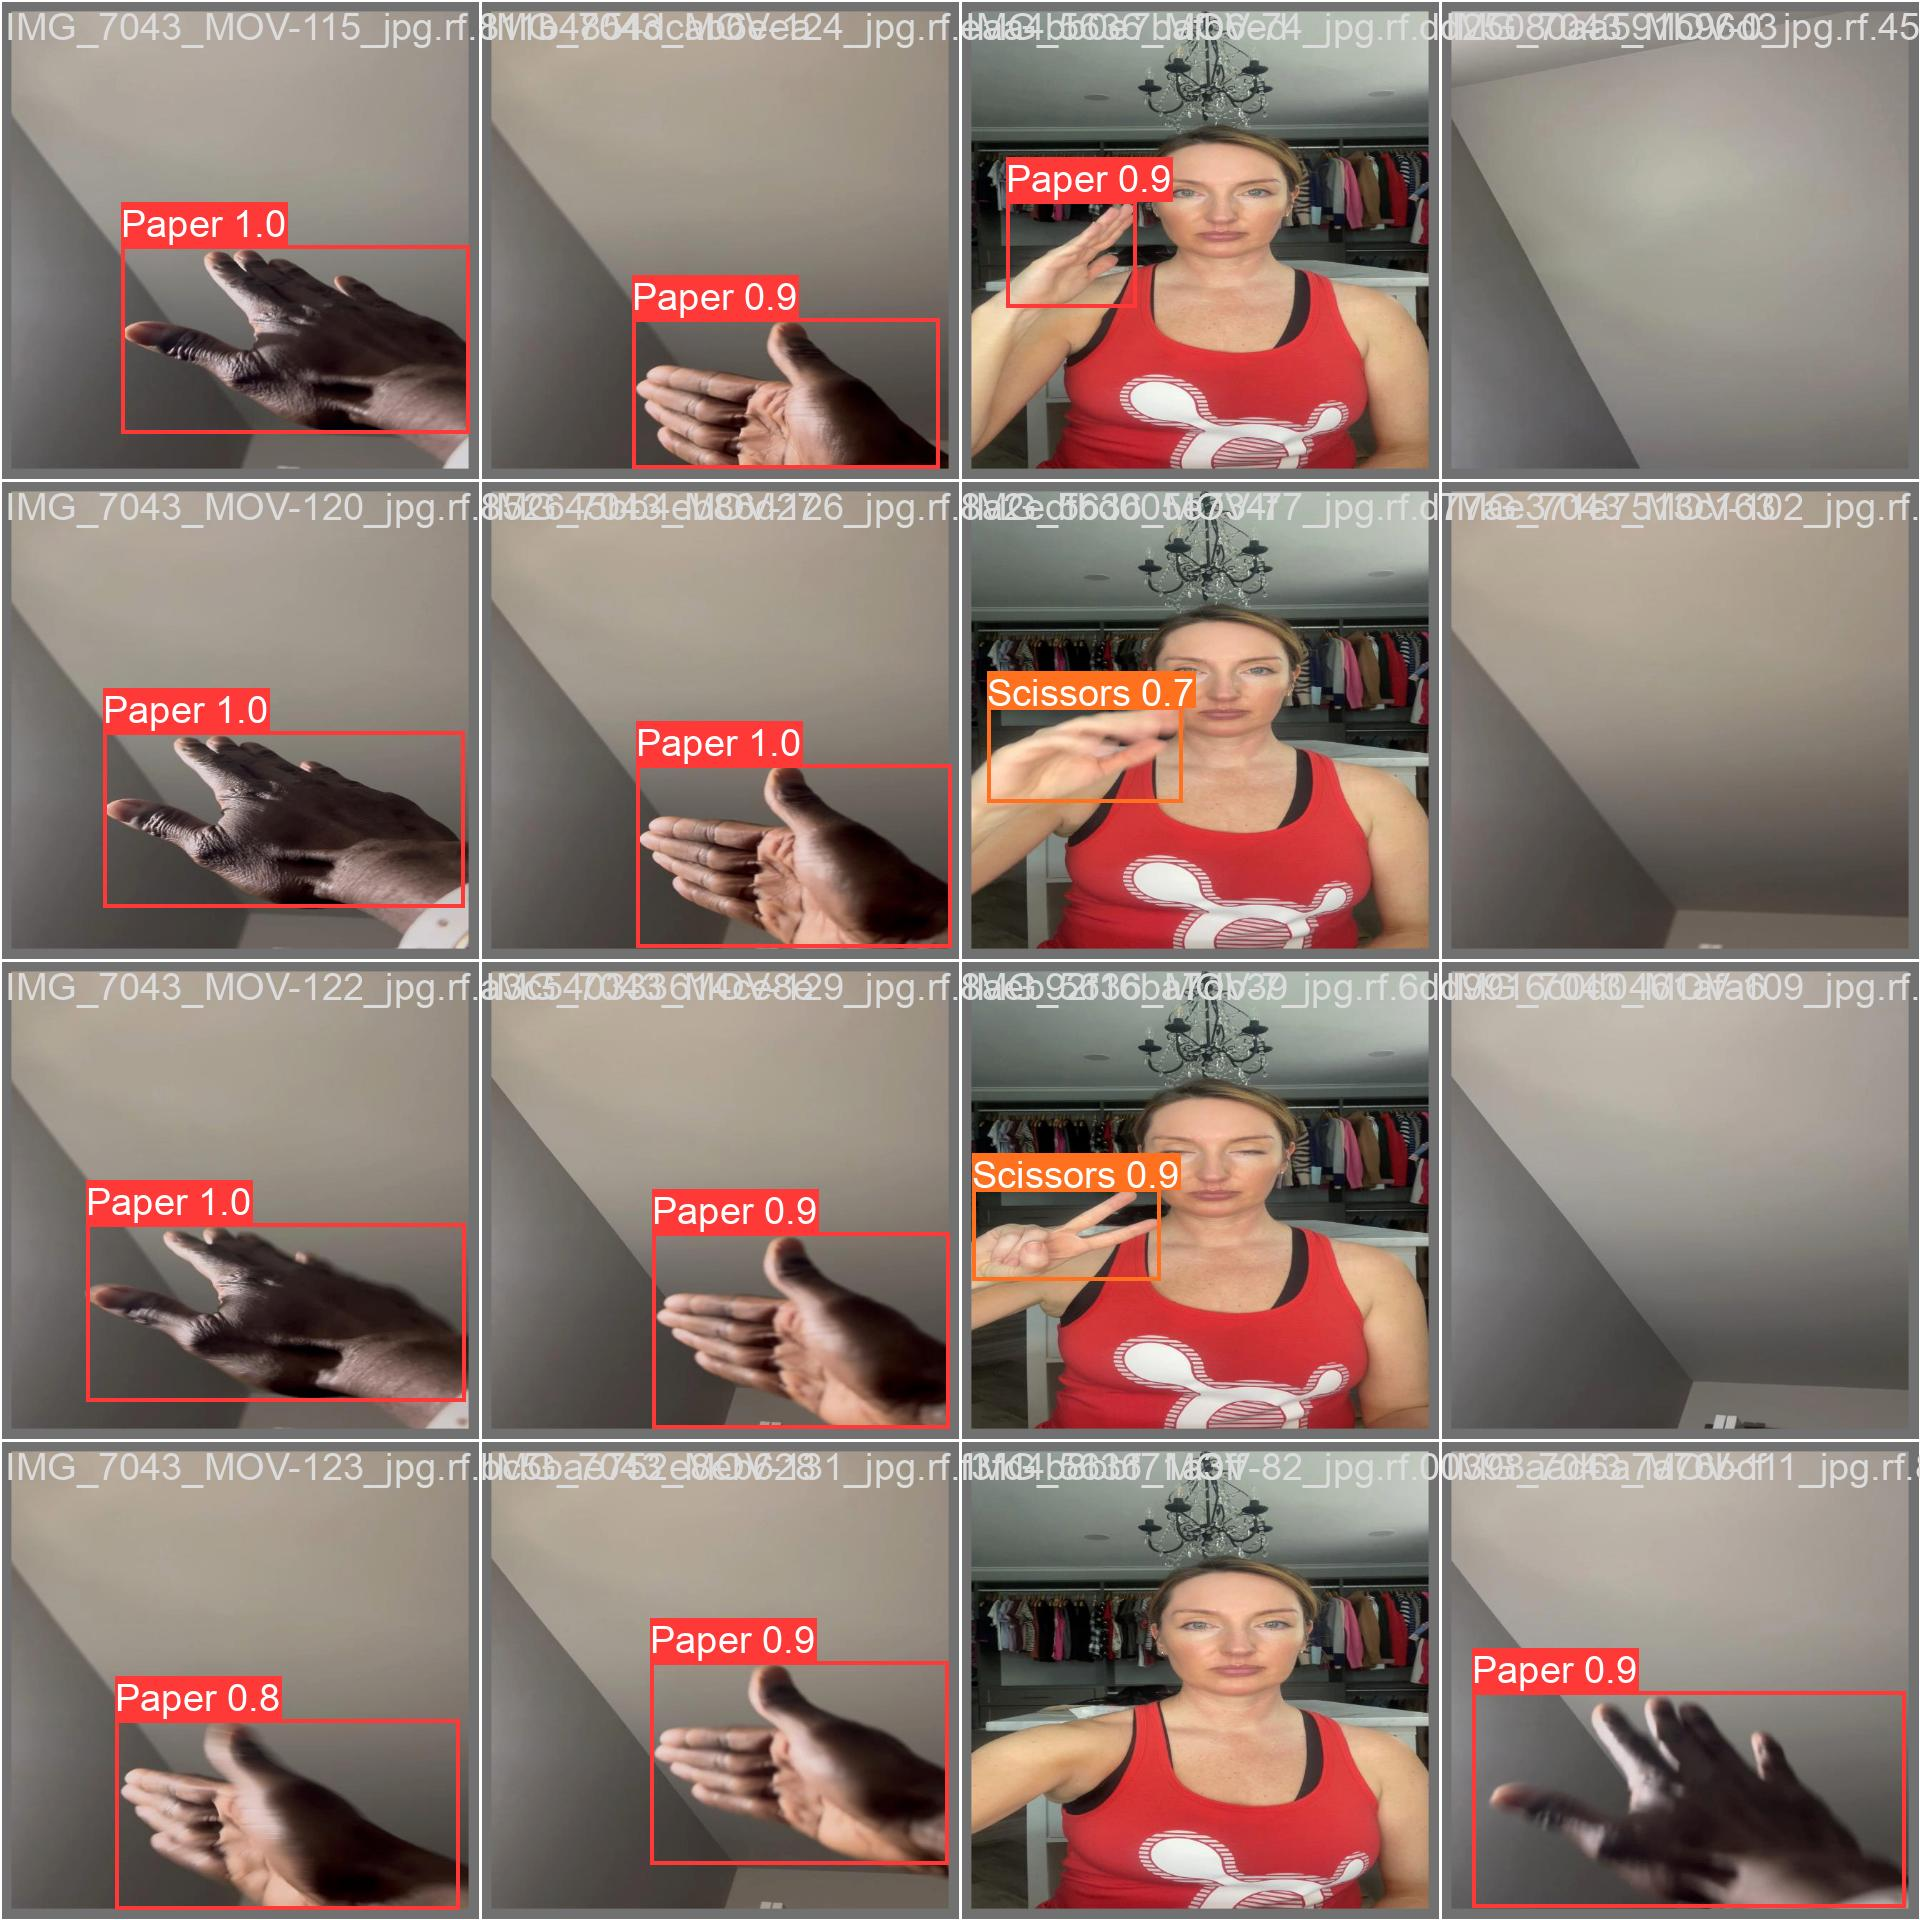

In [9]:
Image(filename='/workspace/data/runs/trains/train/val_batch2_pred.jpg', width=600)

If we compare these two images, we can see that the model performs extremely well. In each image, the hand signs have been correctly classified and located (bounding boxes). Regarding the classifications, it made only one mistake, recognising a Scissors when there was none. However, the model was not that confident for this prediction, since it indicated a confidence index of 0.7. (lowest one among the visualized results), which can be filtered out later by setting a threshold (only keep the detections > 0,8 for example). 

### Precision, Recall, F1 curves

In the context of object detection & classification, **Precision**, **Recall**, and the **F1 score** are commonly used metrics to evaluate the performance of a model. Here's a brief explanation of each metric:

- **Precision**: Precision is the measure of the number of correct predictions (true positive) made by the model out of detections made. In other words, it tells us what proportion of the objects detected by the model are actually present in the image.

- **Recall**: Recall is the measure of the number of correct predictions made by the model out of all actual positive instances in the dataset (Groundtruth). In other words, it tells us what proportion of the objects present in the image are correctly detected by the model.

- **F1 score**: The F1 score is the harmonic mean of precision and recall, which balances these 2 metrics to provide a single measure of the model's performance. F1 score makes it possible to find the optimum threshold value, with an interesting compromise between precision and recall.

By computing these metrics, we can get a better understanding of how well the model is performing and identify areas where it might need improvement. A good model should have both high precision and recall, resulting in a high F1 score.

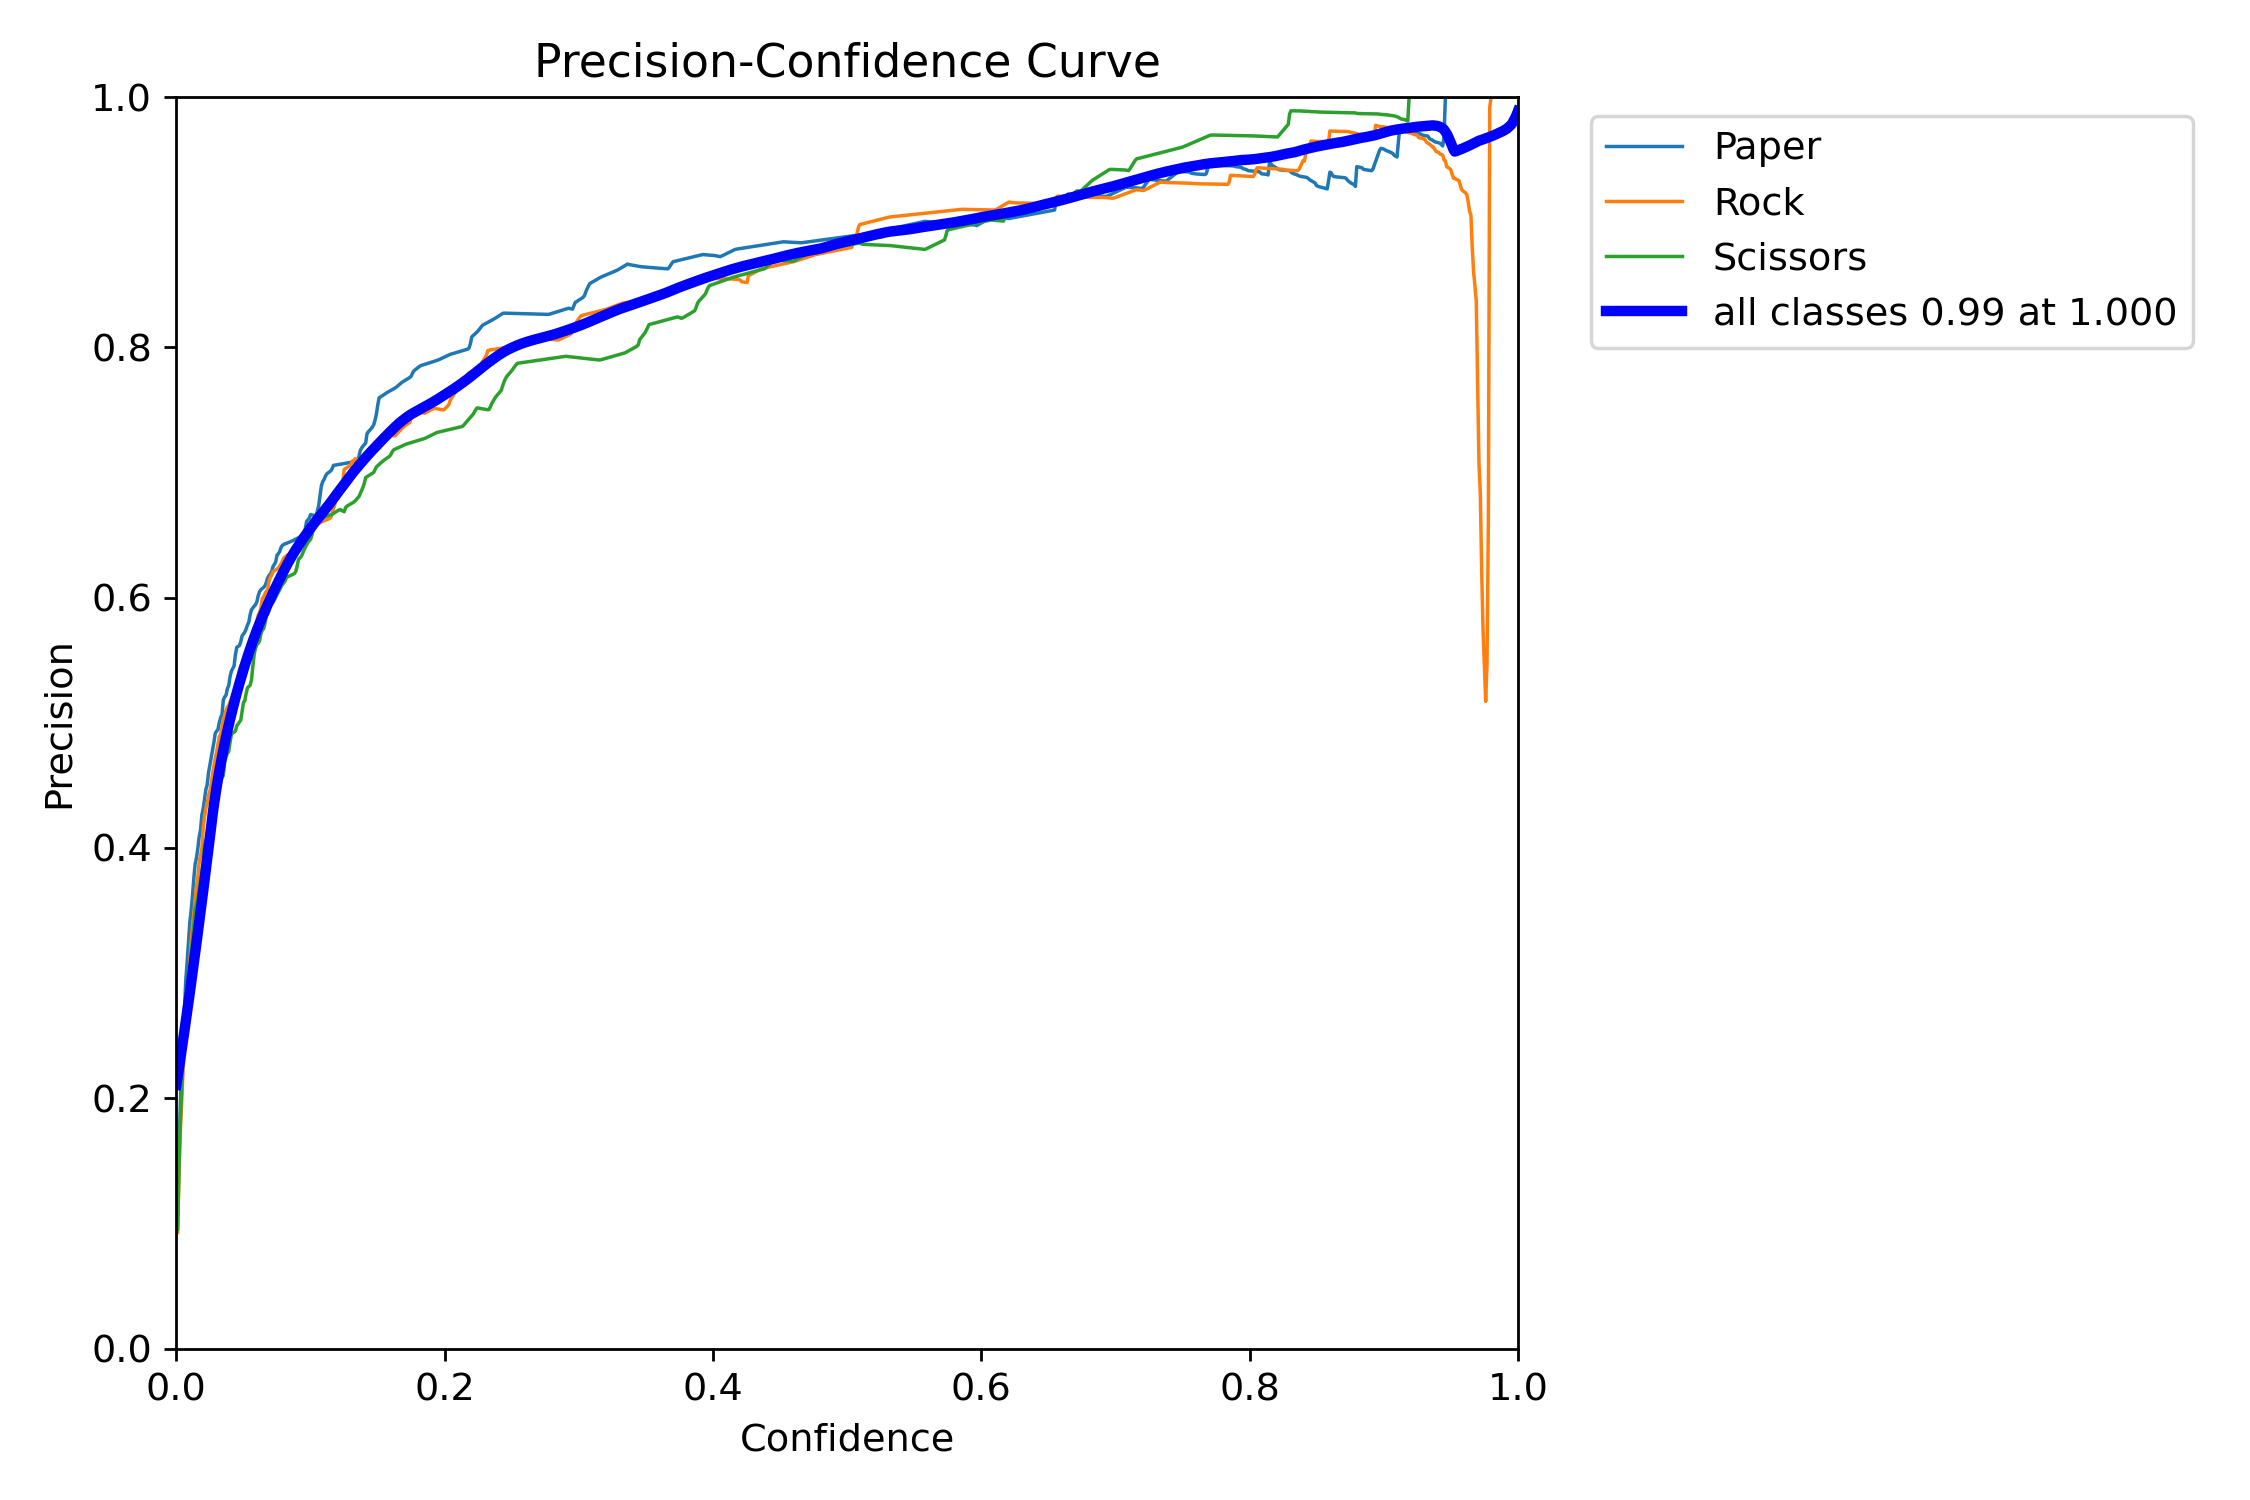

In [11]:
Image(filename='/workspace/data/runs/trains/train/P_curve.png', width=600)

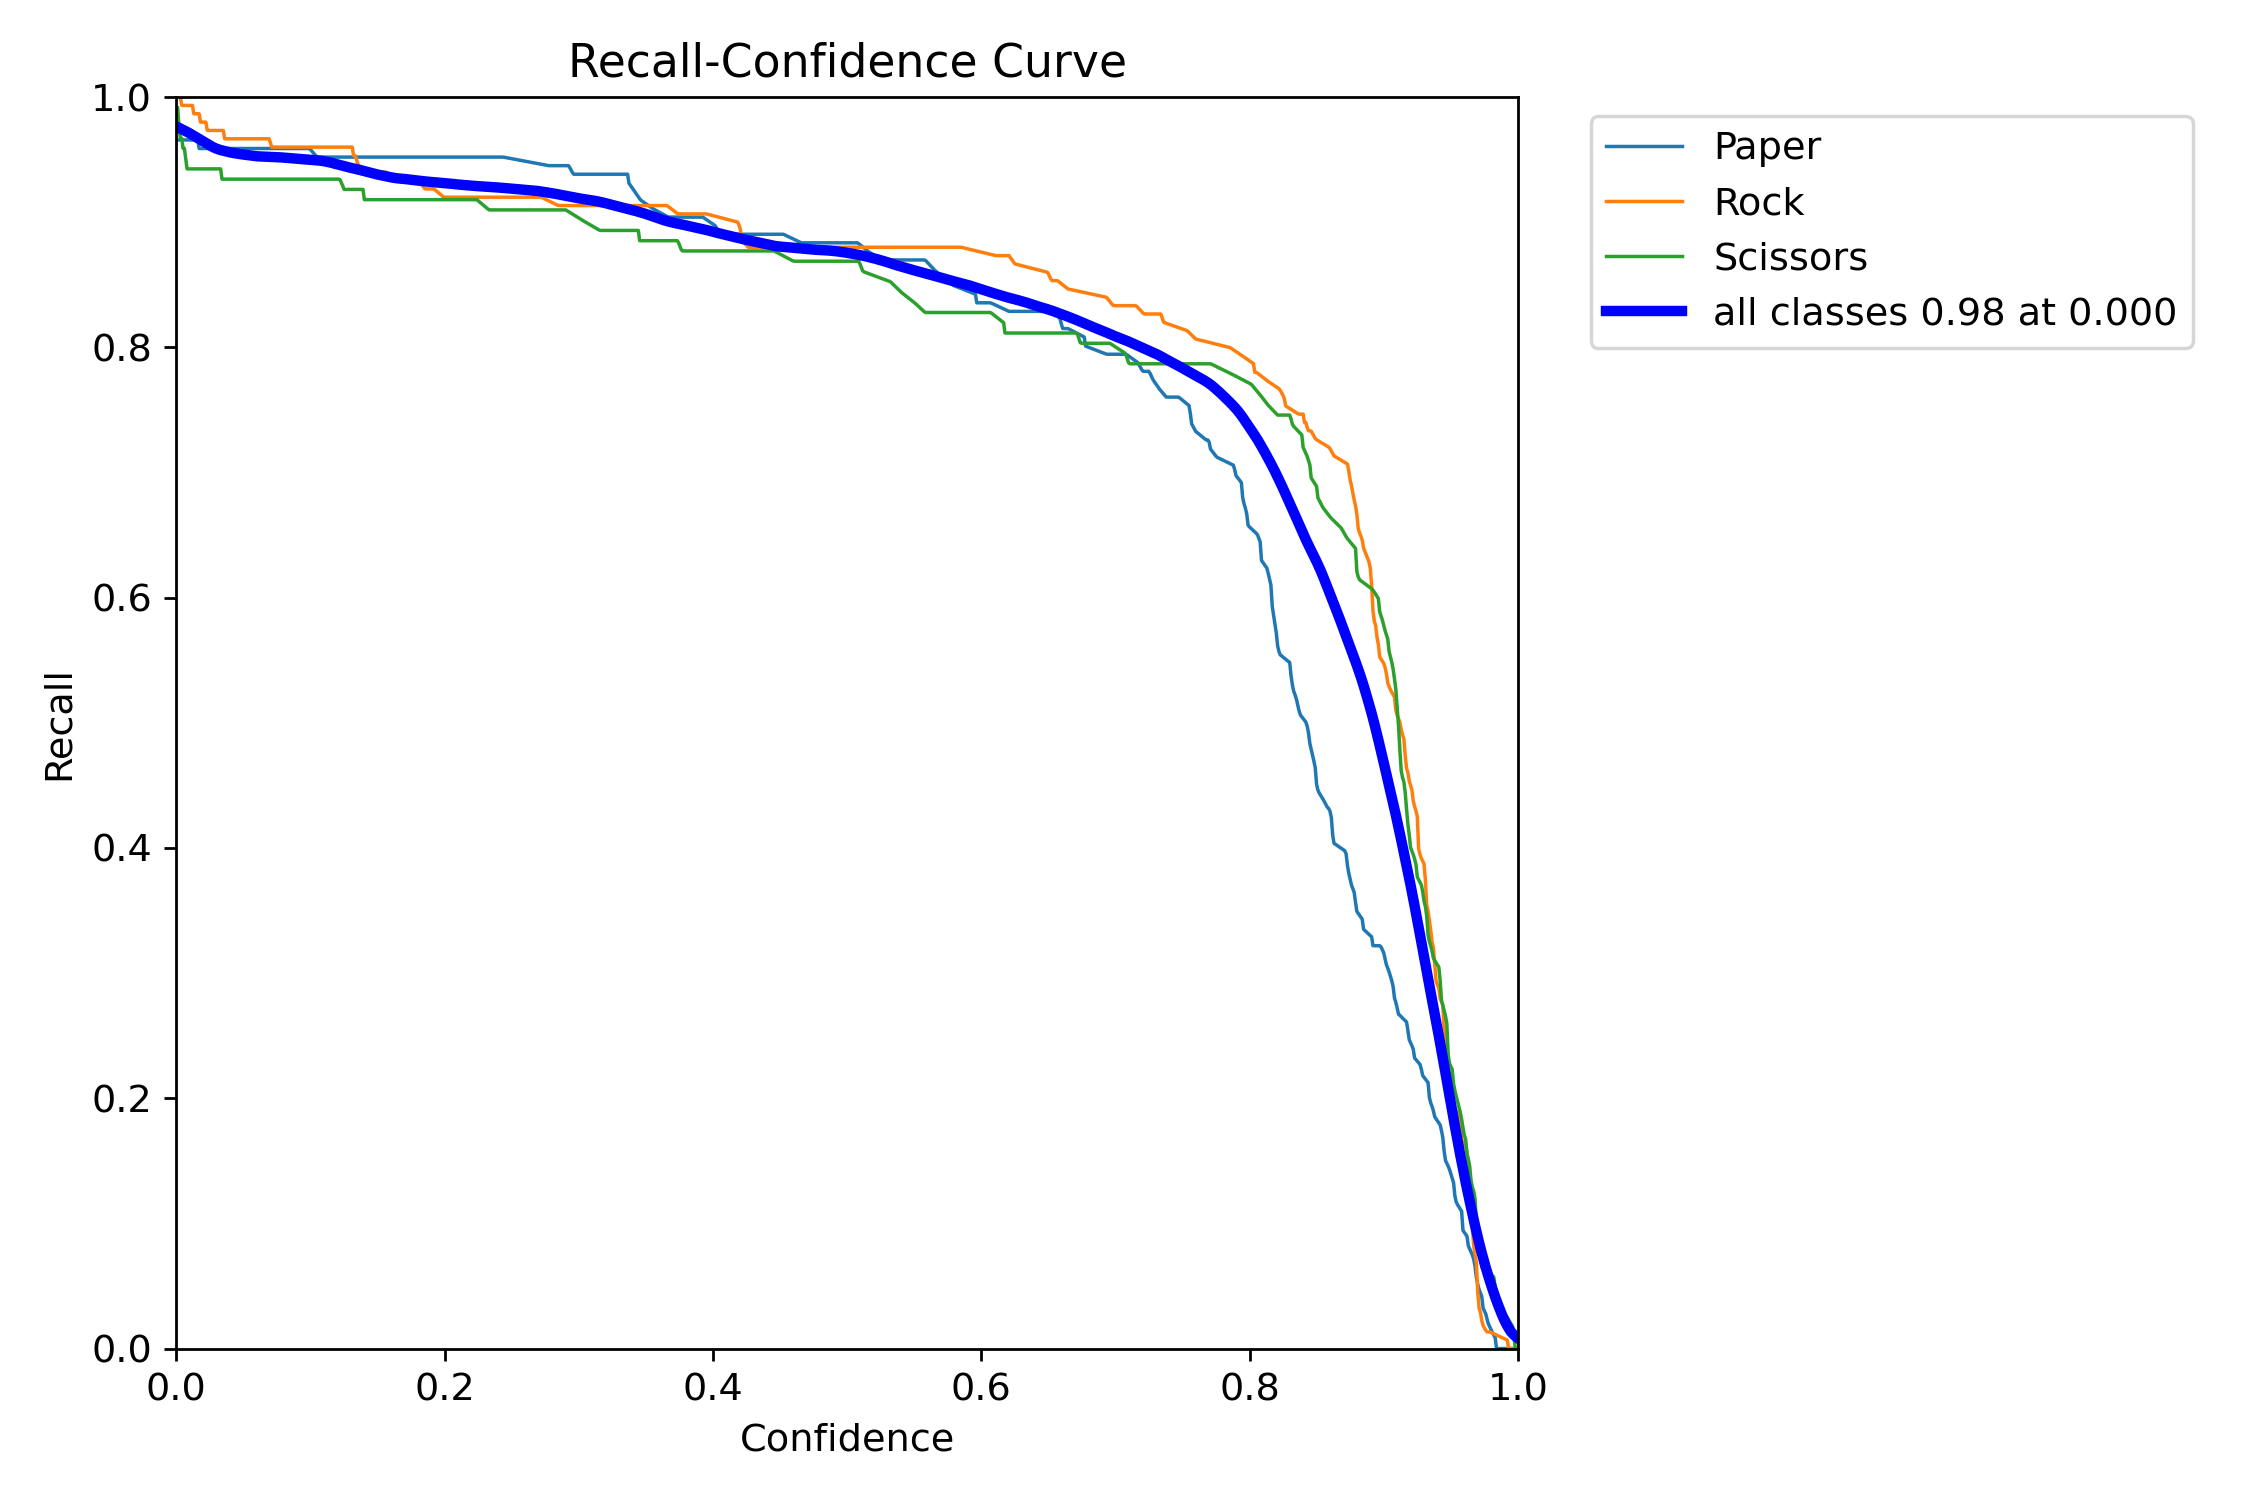

In [12]:
Image(filename='/workspace/data/runs/trains/train/R_curve.png', width=600)

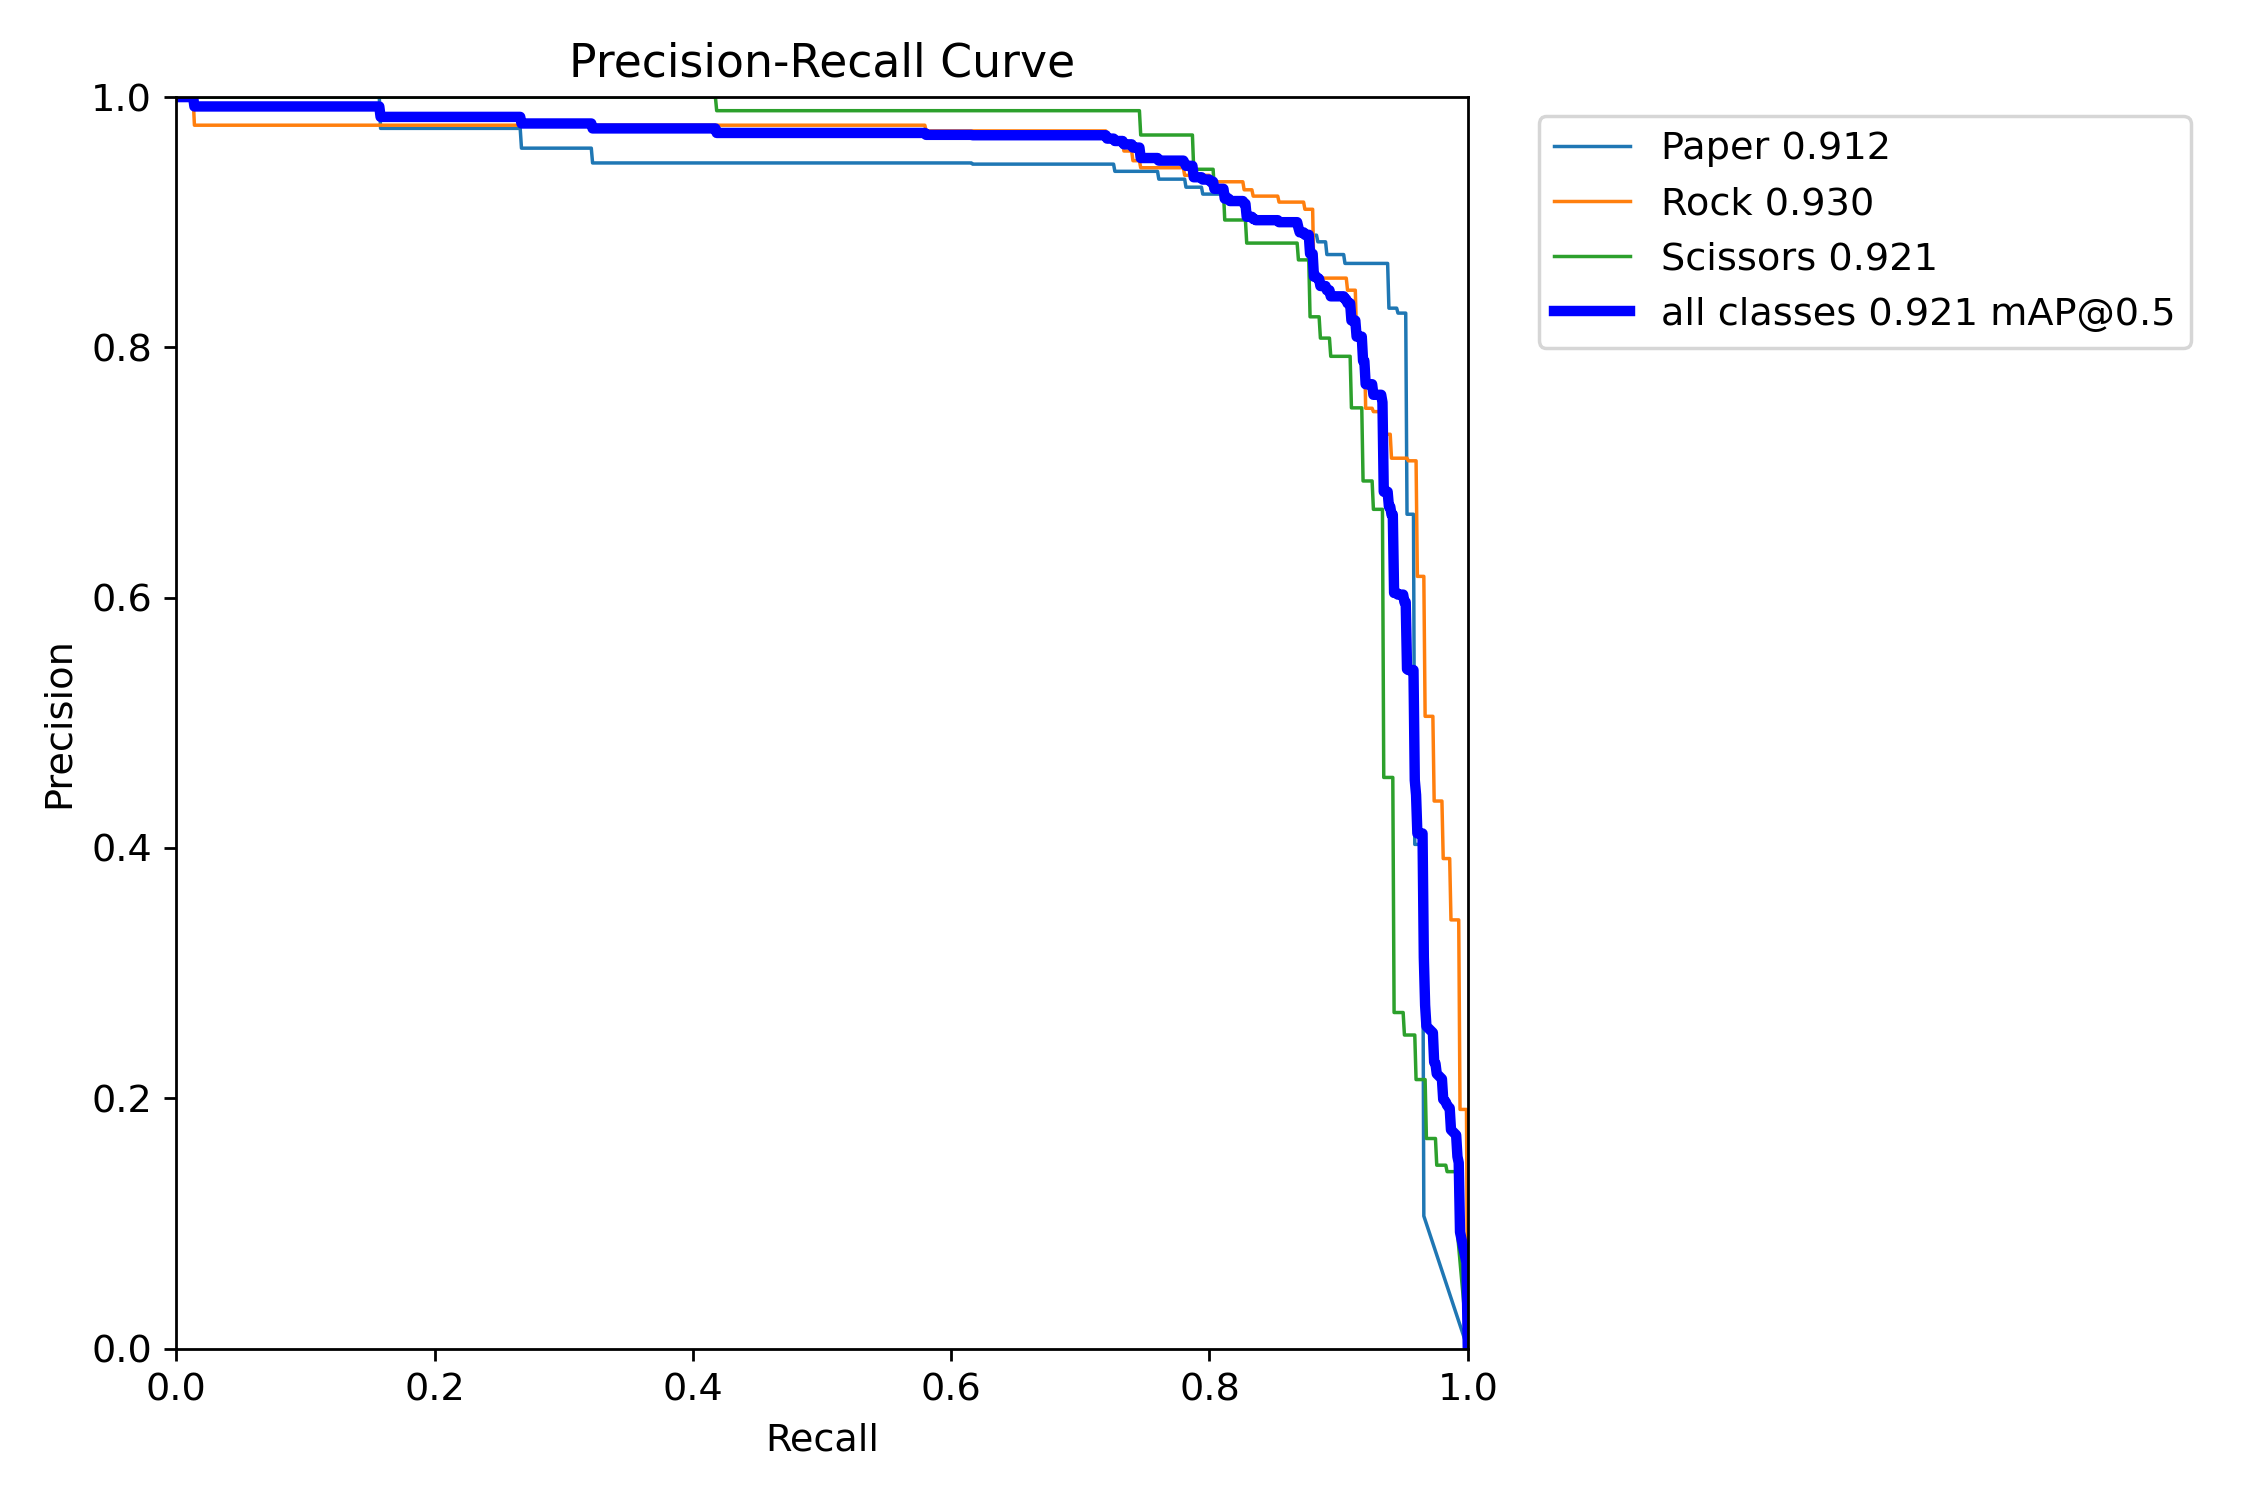

In [13]:
Image(filename='/workspace/data/runs/trains/train/PR_curve.png', width=600)

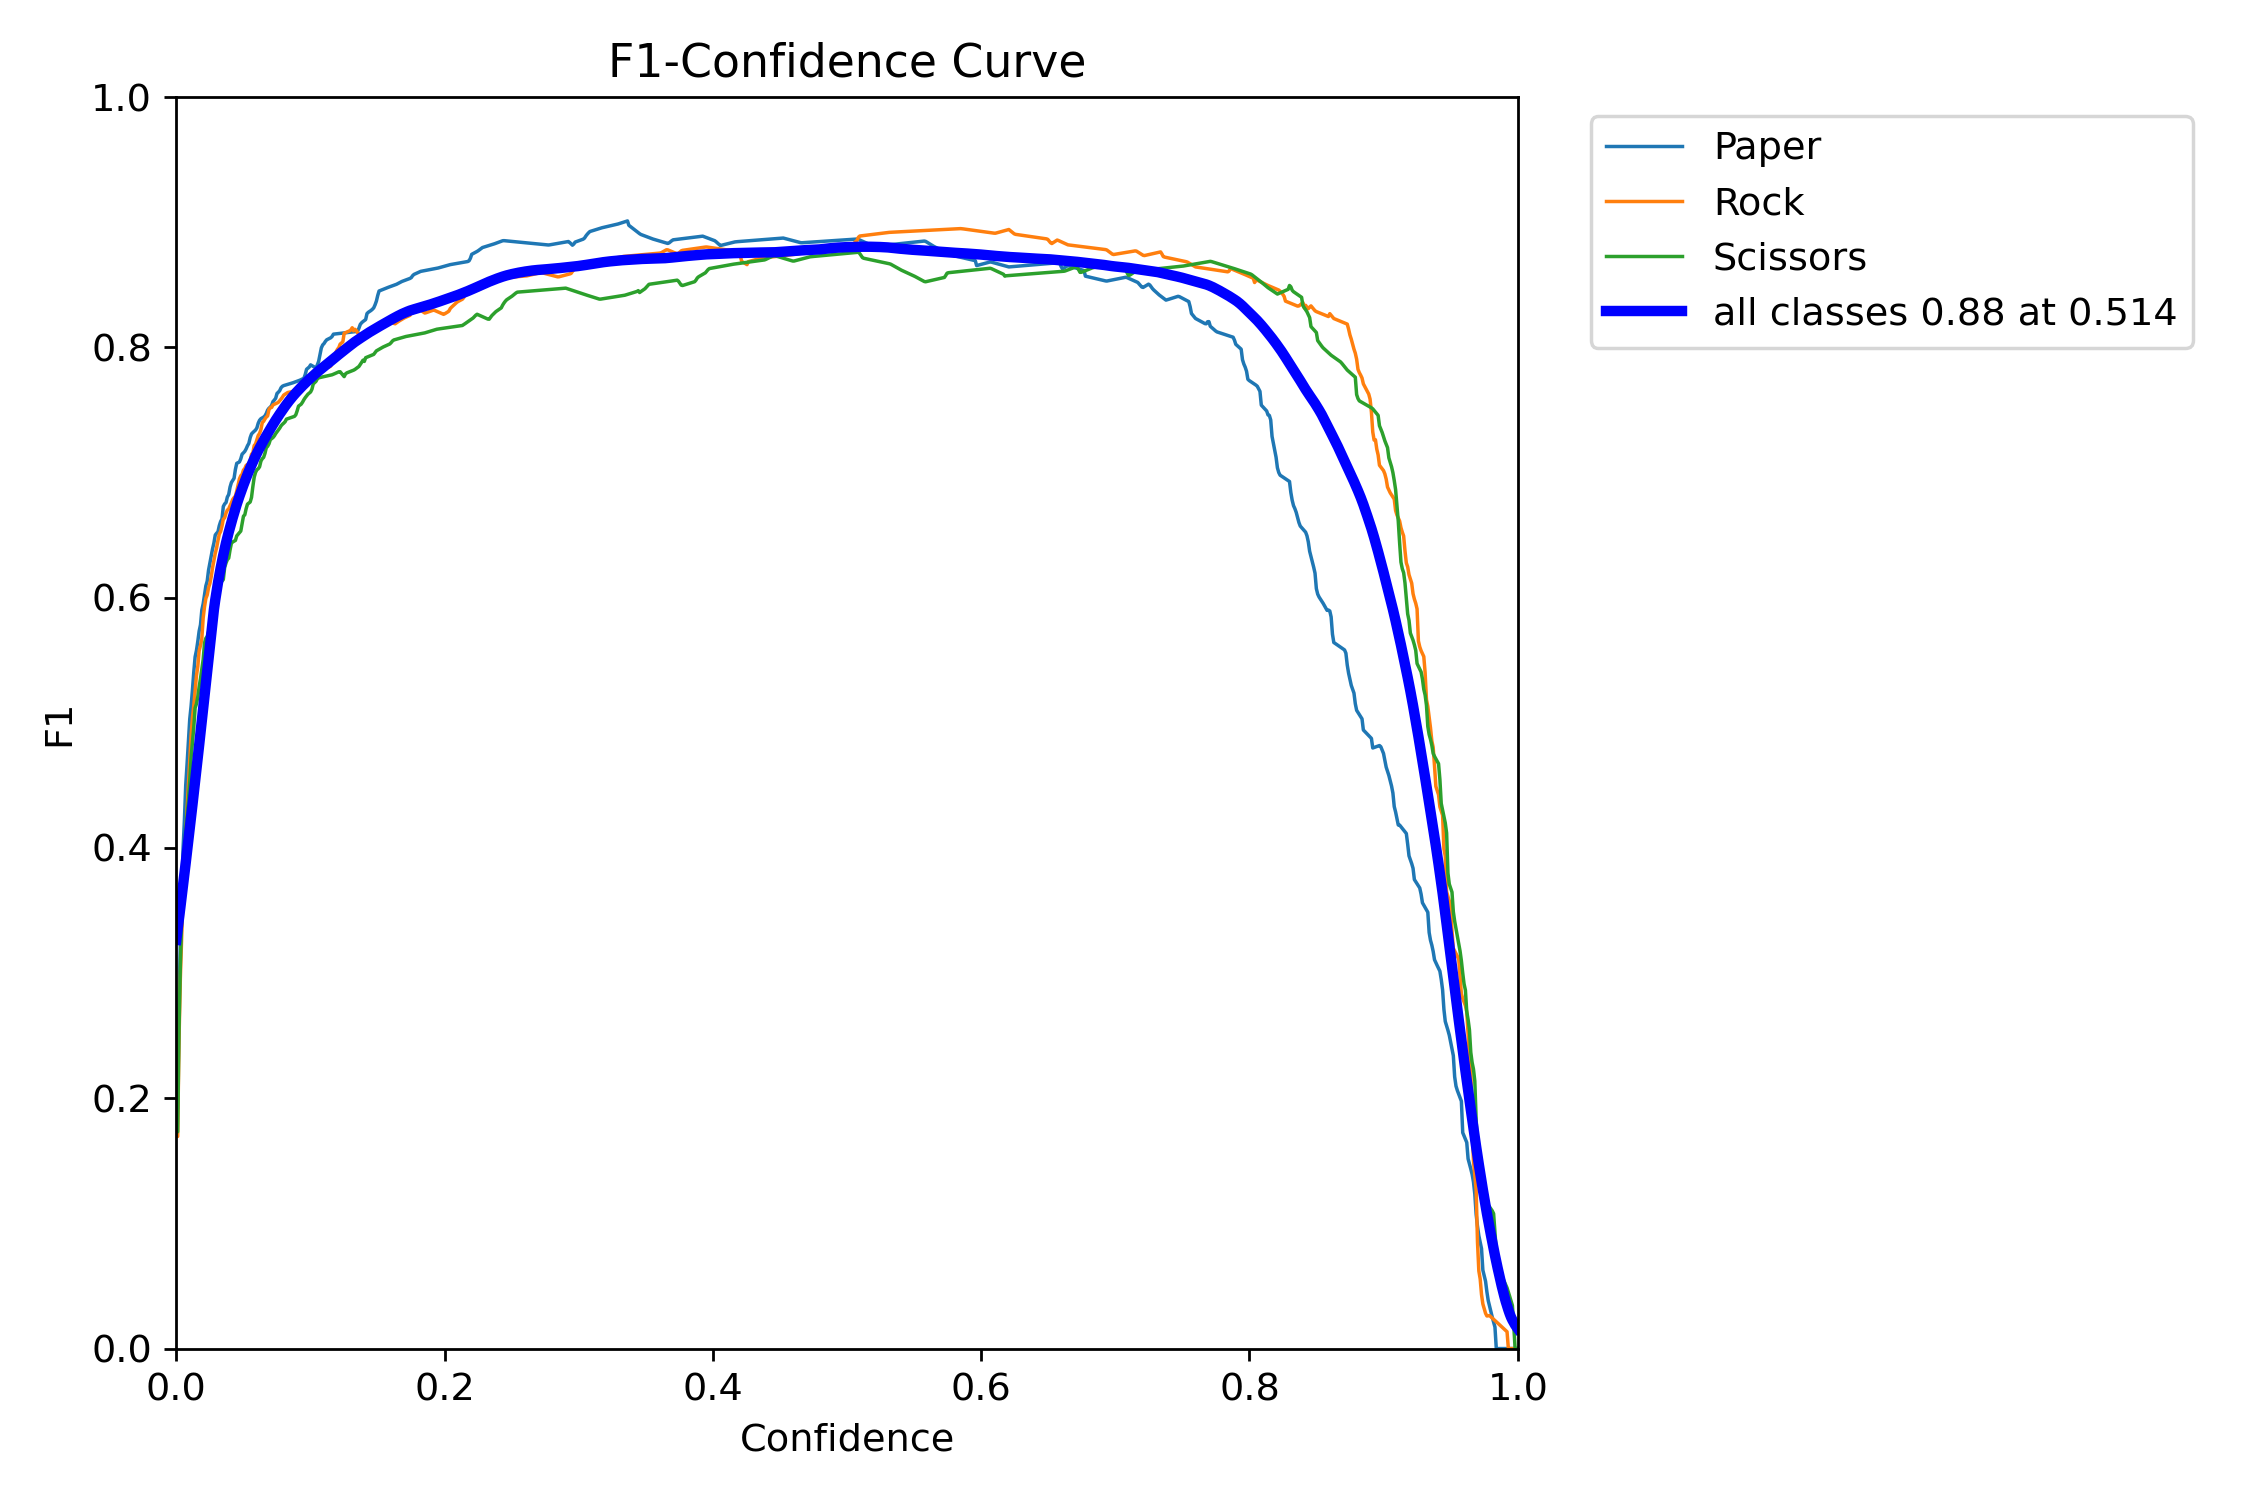

In [14]:
Image(filename='/workspace/data/runs/trains/train/F1_curve.png', width=600)

### General result graphs
This last image groups together several graphs:

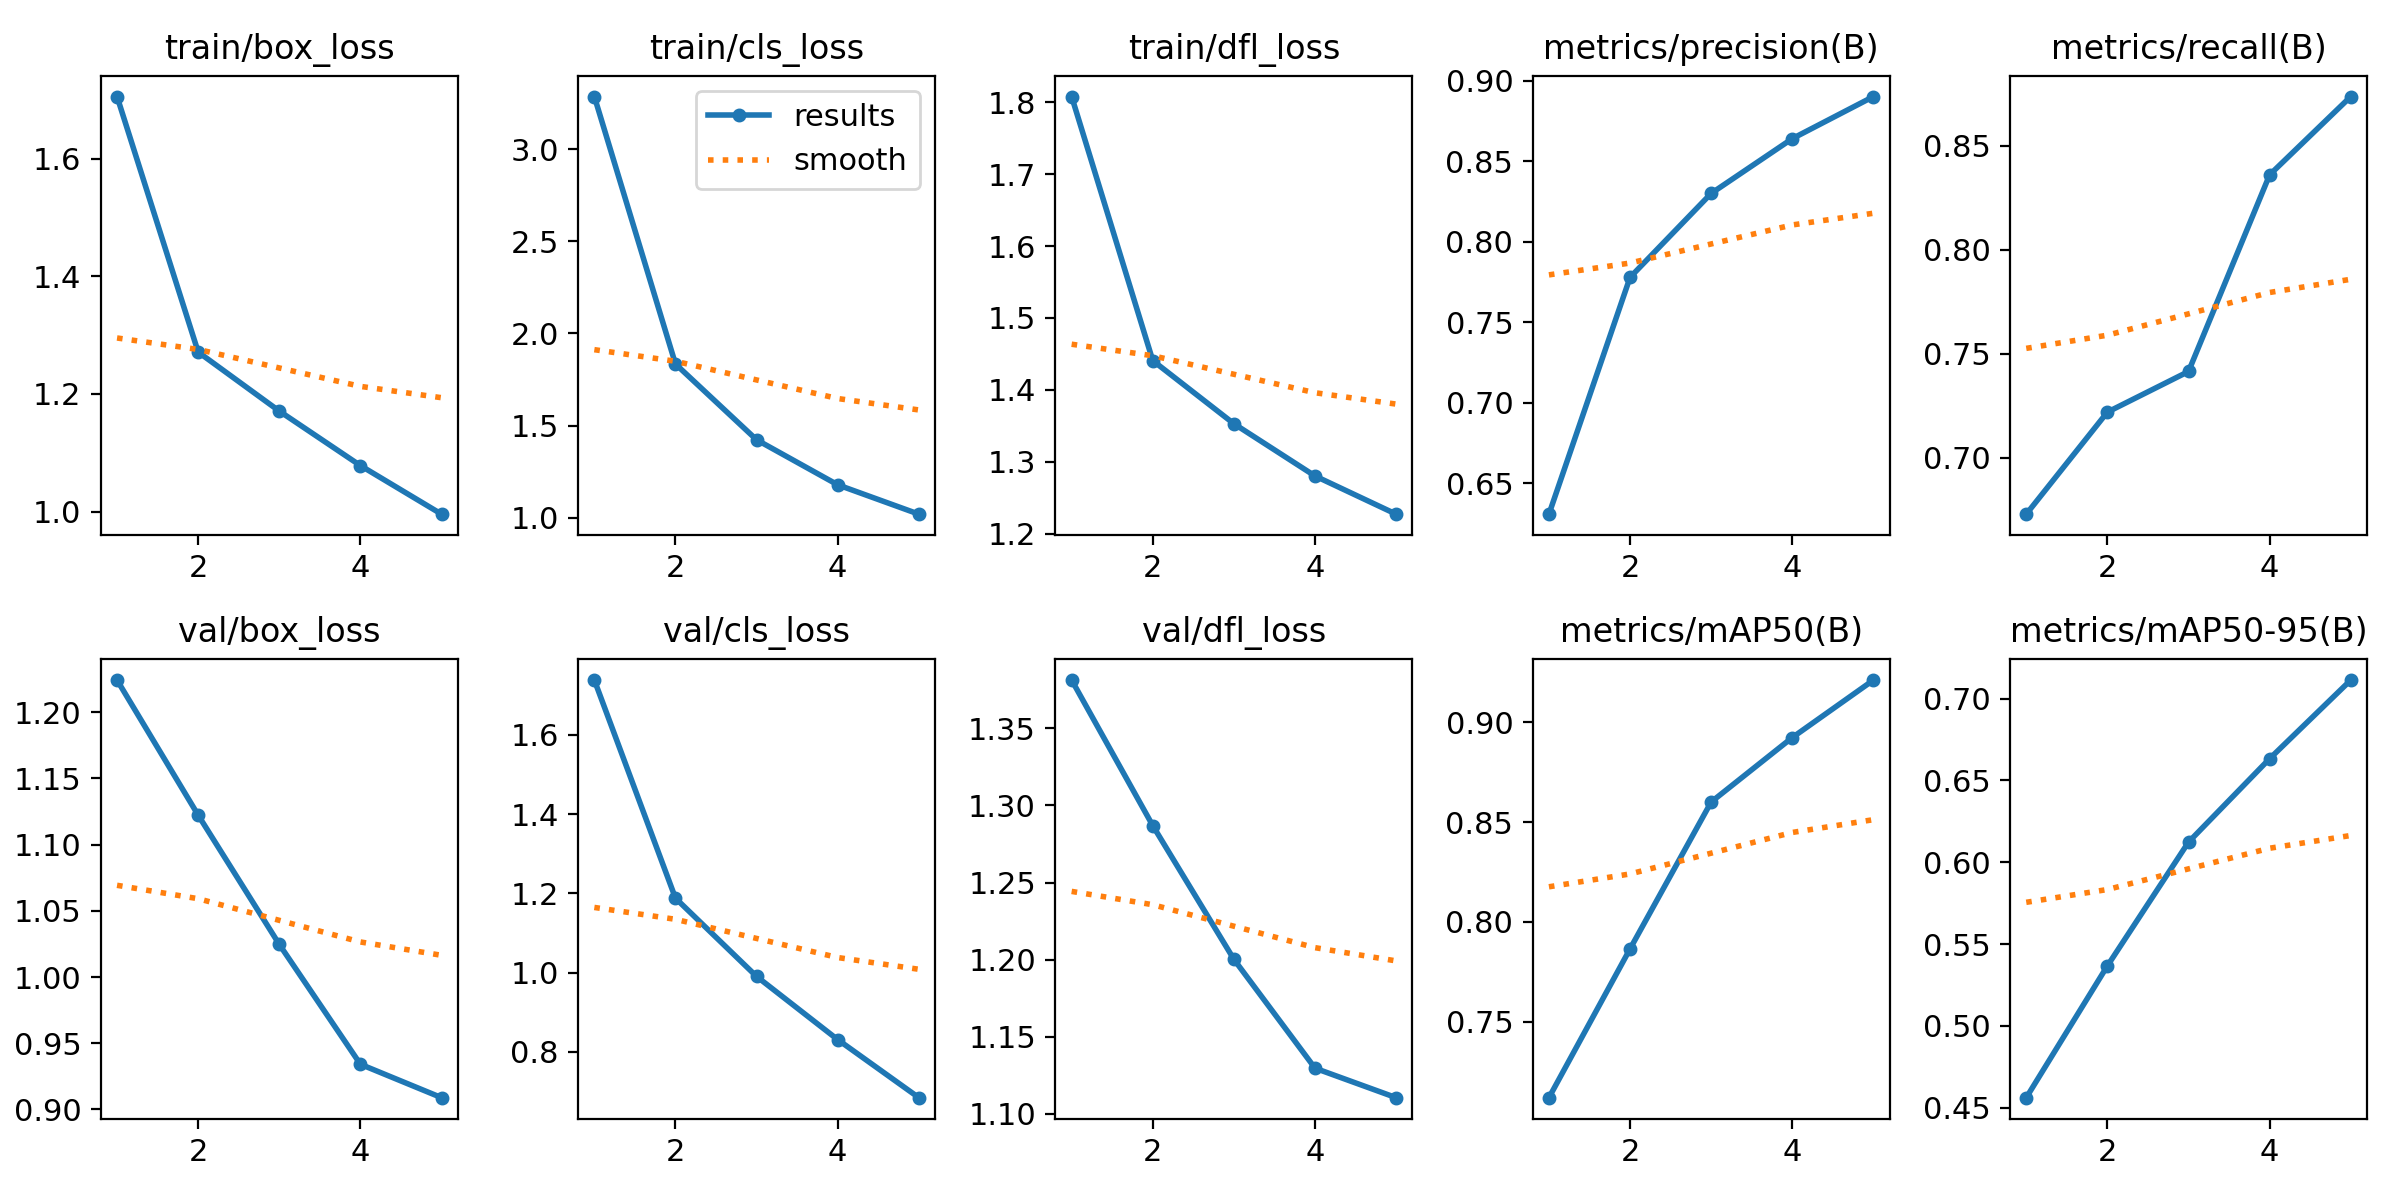

In [15]:
Image(filename='/workspace/data/runs/trains/train/results.png', width=1000)

### Graphs and functions explanation

Three loss functions used to optimize the model's performance during training:

- **box_loss**: This loss is used to optimize the model's ability to predict **accurate bounding boxes** around hand signs in an image. The box loss measures the difference between the predicted bounding box coordinates and the ground truth bounding box coordinates (this is what we call the *Intersection over Union* metric. As the metric decreases, the model becomes more accurate in its detection.
- **cls_loss**: Classification Loss is used to optimize the model's ability to correctly classify hand signs in an image. It measures the difference between the predicted class and the ground truth class labels for each hand sign in an image. As this metric decreases, the model becomes more accurate in its classifications.
- **dfl_loss**: Distribution Focal Loss is also used to optimize the bounding boxes, as the *box_loss*. But the key difference compared to this other metric is that the *dfl_loss* is designed to handle the class imbalance problem.

By using these 3 loss functions, which quantify the difference between the predictions and the labels, both in terms of the location of the hand signs and their nature (Rock; Paper; Scissors), the model is able to improve itself between each epoch.

**Evaluation Metric**:

- **mAP (mean Average Precision)** Based on the previous metrics (Confusion Matrix, Precision, Recall & F1 Score, the mAP measures the quality of the model's predictions (location & class). Its value is between 0 and 1. The higher the score, the more accurate the model is in its detections. When using YOLO, the mAP is first computed for an IoU= 0.5: `mAP@ 0.5`, and then for different IoU thresholds, which gives `mAP@ 0.5:0.95` (from 0.5 to 0.95 in steps of 0.05).

## Export trained weights for future inference

You can consult the [Ultralytics Export Documentation](https://docs.ultralytics.com/modes/export/) for guidance.

In [16]:
# Export the weights
exportedWeights = model.export()
print(exportedWeights)

# Copy the final model to the /workspace/data/ folder
import shutil
shutil.copy(exportedWeights, '/workspace/data/')

Ultralytics YOLOv8.1.42 🚀 Python-3.11.4 torch-2.2.2+cu121 CUDA:0 (Tesla V100S-PCIE-32GB, 32501MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.2.2+cu121...
TorchScript: export success ✅ 1.1s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (1.4s)
Results saved to /workspace/101-AI-and-py/src/notebook/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/workspace/attendee/data.yaml  
Visualize:       https://netron.app
runs/detect/train/weights/best.torchscript


'/workspace/attendee/best.torchscript'

## Create a new YOLO model object based on the exported weights

In [17]:
savedModel = YOLO(exportedWeights)

## Test your YOLO custom model on the 🪨 / 📃 / ✂️ dataset

Perform inference on the contents of the `/workspace/dataset/test` folder.

In [ ]:
# Test the trained model on an image from the test folder
savedModel.predict('/workspace/data/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg', project='/workspace/data/runs/predicts', verbose=True, save=True, conf=0.3)

You can vizualize the resulting images: `/workspace/data/runs/predicts`

✅ The model recognised a rock with great confidence.